# The demonstration of the tropical precipitation module in detailes

# Structure


1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Illustration of some preprocessing possibilities of precipitation diagnostic, such as](#3-illustation-of-some-preprocessing-possibilietes-of-precipitation-diagnostic)

    3.1. [Selection of tropical latitudes](#32-selection-of-tropical-latitudes)

    3.2. [Automatic preprocessing of data](#32-automatic-preprocessing-of-data)

4. [Calculation of histogram of precipitation/tropical precipitation](#4-calculation-of-histogram-of-precipitationtropicalprecipitation)

    4.1. [with manual data preprocessing](#41-diagnostic-with-manual-data-preprocessing)

    4.2 [automatic data preprocessing](#42-diagnostic-with-automatic-data-preprocessing)

    4.3. [with non uniform binning](#43-histogram-with-not-uniform-binning)
    
5. [Calculation time expectation for a total dataset](#5-expected-calculation-time-for-entire-dataset)
 
6. [Creation of graphics with a graphic module](#6-creation-of-graphics)

    6.1. [Creation of images](#61-images)
    
    6.2. [Creation of animation](#62-animation)

    6.3  [Creation of images of high and low resolution](#63-images-with-the-regrided-the-coordinates)

[Go to the end of file](#the-end)

#

## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import functions_for_xarrays,  graphic_creator, time_functions
sys.path.insert(0, '../')
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag

#### IFS data

In [2]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
ifs = reader.retrieve(regrid=True)

In [7]:
ifs

<xarray.Dataset>
Dimensions:    (time: 8329, lat: 1800, lon: 3600, level: 5)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20 ... 2021-01-01
  * lat        (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon        (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * level      (level) int64 1 2 3 4 5
Data variables: (12/81)
    100si      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    100u       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    100v       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10u        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    10v        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    2d         (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    ...         ...
    uvb        (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vike       (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vipie      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vipile     (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    vithe      (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    z          (time, lat, lon) float64 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

#### Regriding the small part/chunk of dataset for tests

In [3]:
ifs_chunk = ifs["tprate"][10:30,:]
ifs_chunk

<xarray.DataArray 'tprate' (time: 20, lat: 1800, lon: 3600)>
dask.array<getitem, shape=(20, 1800, 3600), dtype=float64, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 2. Initializing the class object and setting the class attributes

In [ ]:
help(TR_PR_Diag)

In [14]:
diag = TR_PR_Diag()

diag.trop_lat = 10

diag.num_of_bins    = 15
diag.first_edge     = 0
diag.width_of_bin   = 1*10**(-4)/diag.num_of_bins
diag.bins           = None


#### User can put specify all attributes during initialization of class object 

In [4]:
diag = TR_PR_Diag(num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 3. Illustration of some preprocessing possibilities of precipitation diagnostic

#### Units of precepitation rate

In [18]:
ifs_chunk.attrs['units']

'm s**-1'

### 3.1 Selection of tropical latitudes

In [5]:
ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk)

In [12]:
ifs_chunk_trop

<xarray.DataArray 'tprate' (time: 20, lat: 200, lon: 3600)>
dask.array<where, shape=(20, 200, 3600), dtype=float64, chunksize=(1, 200, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 9.65 9.75 9.85 9.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### We can modify the selected tropical area as 

In [21]:
diag.trop_lat = 25

ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk)

#### OR 

In [91]:
ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk, trop_lat = 10)

In [22]:
ifs_chunk_trop

<xarray.DataArray 'tprate' (time: 20, lat: 500, lon: 3600)>
dask.array<where, shape=(20, 500, 3600), dtype=float64, chunksize=(1, 500, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T05:00:00
  * lat      (lat) float64 -24.95 -24.85 -24.75 -24.65 ... 24.75 24.85 24.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 3.2. Automatic preprocessing of data

#### Preprocessing can includes

 - selection of latitude range
 - selection of time range

In [6]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10,  f_time = 25, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

data = diag.preprocessing(ifs)

In [ ]:
diag = TR_PR_Diag(trop_lat = 10, s_month=3,  f_month=4, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

data = diag.preprocessing(ifs)

In [ ]:
data = diag.preprocessing(ifs,  s_time = '2020:01', f_time ='2020/03/20/12')

In [ ]:
data = diag.preprocessing(ifs, trop_lat = 10,  s_time = '2020', f_time ='2020.03.20')

## 4. Calculation of histogram of precipitation/tropicalprecipitation


### 4.1. Diagnostic with manual data preprocessing

### Fastest histogram

In [9]:
hist_IFS  = diag.hist1d_fast(ifs, s_time = 20, f_time = 30)
hist_IFS

<xarray.DataArray (bin: 15)>
array([6.773495e+06, 1.040800e+05, 5.275700e+04, 3.551500e+04,
       2.599600e+04, 2.061800e+04, 1.656500e+04, 1.413400e+04,
       1.213200e+04, 1.055400e+04, 9.255000e+03, 8.336000e+03,
       7.336000e+03, 6.682000e+03, 6.221000e+03])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [7]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10,  f_time = 25, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

hist_IFS  = diag.hist1d_fast(ifs)
hist_IFS

<xarray.DataArray (bin: 15)>
array([10024387.,   182325.,    91300.,    60496.,    44693.,    34808.,
          28400.,    23838.,    20361.,    17703.,    15588.,    13865.,
          12551.,    11098.,    10211.])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [15]:
hist_IFS_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
hist_IFS_trop

<xarray.DataArray (bin: 15)>
array([1.3432997e+07, 2.3170900e+05, 1.1512100e+05, 7.6323000e+04,
       5.6298000e+04, 4.3959000e+04, 3.5616000e+04, 3.0077000e+04,
       2.5641000e+04, 2.2335000e+04, 1.9644000e+04, 1.7486000e+04,
       1.5643000e+04, 1.4076000e+04, 1.2983000e+04])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### We can use `bins` attribute instead of  `num_of_bins`,    `first_edge`,    `width_of_bin`

In [15]:
diag.num_of_bins, diag.first_edge, diag.width_of_bin = None, None, None
n=15
bins = [i*1*10**(-6)/n for i in range(0, n)]

In [16]:
hist_IFS_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False, bins=bins)
hist_IFS_trop

<xarray.DataArray (bin: 15)>
array([1.3404965e+07, 2.3917300e+05, 1.1689400e+05, 7.7315000e+04,
       5.6905000e+04, 4.4768000e+04, 3.6254000e+04, 3.0433000e+04,
       2.6138000e+04, 2.2681000e+04, 2.0056000e+04, 1.7872000e+04,
       1.5890000e+04, 1.4514000e+04, 1.3067000e+04])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

#### OR

In [ ]:
diag.bins = bins 
hist_IFS_trop  = diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
hist_IFS_trop

## 4.2. Diagnostic with automatic data preprocessing

In [50]:
diag = TR_PR_Diag()


diag.num_of_bins = 15
diag.first_edge = 0
diag.width_of_bin = 1*10**(-4)/diag.num_of_bins

diag.trop_lat = 10
diag.s_time = 10
diag.f_time = 20

#### OR

In [8]:
diag = TR_PR_Diag(trop_lat = 10, s_time = 10, f_time = 20, num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)


In [10]:
hist_IFS_prepr  = diag.hist1d_fast(ifs)
hist_IFS_prepr 

<xarray.DataArray (bin: 15)>
array([6659502.,  127629.,   62364.,   40808.,   30302.,   23341.,
         19051.,   15943.,   13509.,   11781.,   10389.,    9150.,
          8307.,    7394.,    6762.])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 8e-07 8.667e-07 9.333e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [ ]:
hist_IFS_prepr  = diag.hist1d_fast(ifs, trop_lat = 10, s_month=3,  f_month=4)
hist_IFS_prepr 

In [ ]:
diag = TR_PR_Diag(trop_lat = 10, s_time = '2020:01', f_time ='2020/03/20/12', num_of_bins = 15, first_edge = 0, width_of_bin = 1*10**(-6)/15)

hist_IFS_prepr  = diag.hist1d_fast(ifs)
hist_IFS_prepr 

In [ ]:
hist_IFS_prepr  = diag.hist1d_fast(ifs, trop_lat = 10, s_time = '2020', f_time ='2020.03.20')
hist_IFS_prepr 

### 4.3. Histogram with not uniform binning

In [17]:
#bins = numpy.logspace(-9, -6, 15)
bins = [1.00000000e-09, 1.63789371e-09, 2.68269580e-09, 4.39397056e-09,
       7.19685673e-09, 1.17876863e-08, 1.93069773e-08, 3.16227766e-08,
       5.17947468e-08, 8.48342898e-08, 1.38949549e-07, 2.27584593e-07,
       3.72759372e-07, 6.10540230e-07, 1.00000000e-06]

In [9]:
diag = TR_PR_Diag(bins = bins, s_time = 10, f_time = 30)

In [18]:
hist_IFS_trop_logspaced  = diag.hist1d_np(ifs_chunk_trop, preprocess=False, bins=bins)
hist_IFS_trop_logspaced

<xarray.DataArray (bin: 14)>
array([826501, 904330, 971338, 994507, 912120, 703004, 461945, 289736,
       197269, 155523, 137858, 125026, 111833,  98421])
Coordinates:
  * bin      (bin) float64 1e-09 1.638e-09 2.683e-09 ... 3.728e-07 6.105e-07
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

## 5. Expected calculation time for entire dataset

####  Checking the calculation time of a small chunk of the dataset

In [6]:
result = %timeit -r 2 -n 1 -o  diag.hist1d_fast(ifs_chunk_trop,  preprocess = False)
time_fast_reg, time_fast_reg_stdev =  result.average, result.stdev 

8.85 s ± 582 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


#### Estemated calculation time of entire dataset

In [11]:
from aqua.benchmark.time_functions import estimated_total_calc_time as estimated_total_calc_time
from aqua.benchmark.time_functions import optimal_amount_of_timesteps as optimal_amount_of_timesteps

In [10]:
estimated_total_calc_time(ds_part = ifs_chunk_trop, calc_time = time_fast_reg, ds_full = ifs,  units='D')

(165811.5672948048, 1.9191153622083887)

#### Optimal amount of timesteps

In [13]:
optimal_amount_of_timesteps(ds_part = ifs_chunk_trop, calc_time = time_fast_reg,  ds_full = ifs, wanted_time ='3H')

(0.06513417716387744, 542)

#

## 6. Creation of graphics 

### 6.1. Images

#### Plot of obtained histogram 

#### We can make plots of frequency histograms. We need to set `pdf` argument in `hist_plot` function to `False` 

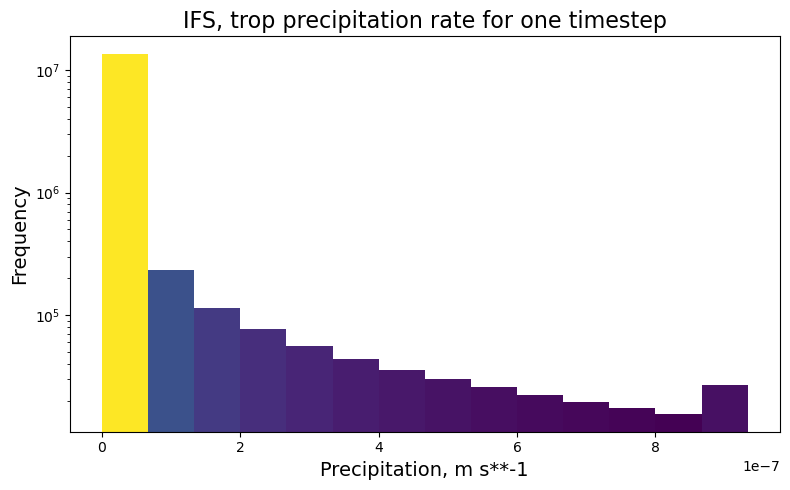

In [21]:
diag.hist_plot(hist_IFS_trop, pdf = False, smooth = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate for one timestep")

#### Or we can create a pdf histogram by setting `pdf = True` in `hist_plot` function. (Default value of `pdf` is `True`)

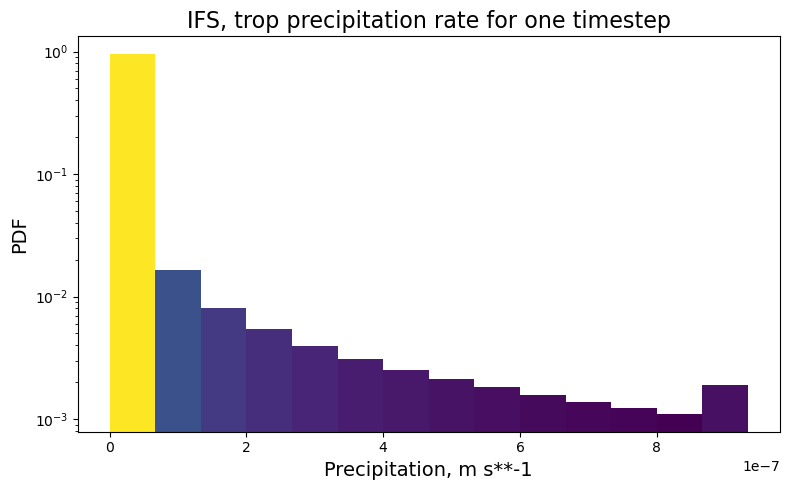

In [22]:
diag.hist_plot(hist_IFS_trop, pdf = True, smooth = False, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate for one timestep")

#### We can also plot typical 2D dependence of counts versus the right edge of the bins by setting the `smooth = True.` It is also a default value.

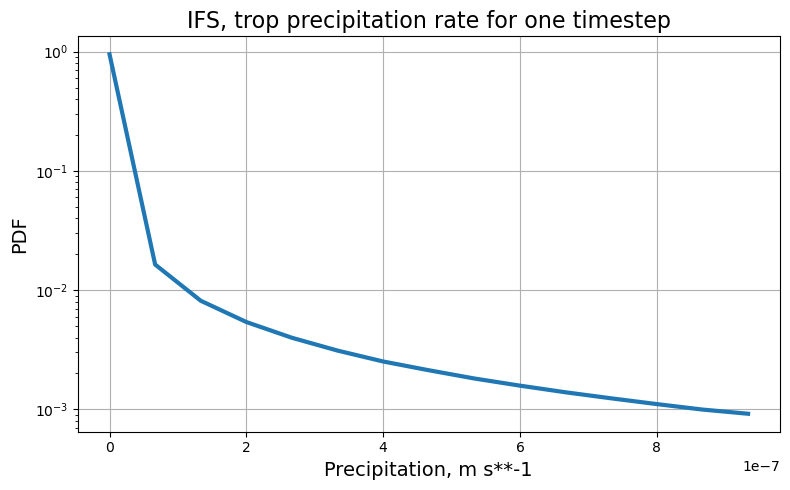

In [24]:
diag.hist_plot(hist_IFS_trop, pdf = True, smooth = True, label='IFS/IFS_trop', plot_title = "IFS, trop precipitation rate for one timestep")

### Histogram of logspaced binning. Argument `xlogscale=True` setting x-axe to the log scale. By default `xlogscale=False` 

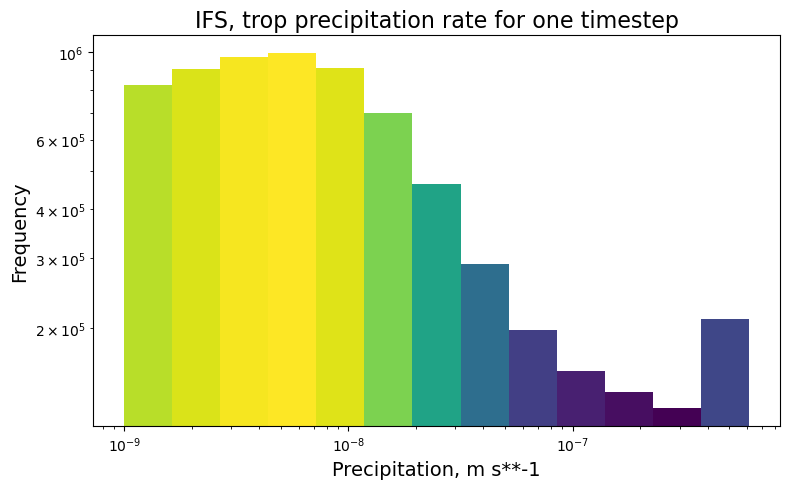

In [27]:
diag.hist_plot(hist_IFS_trop_logspaced, pdf = False, smooth = False, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### OR

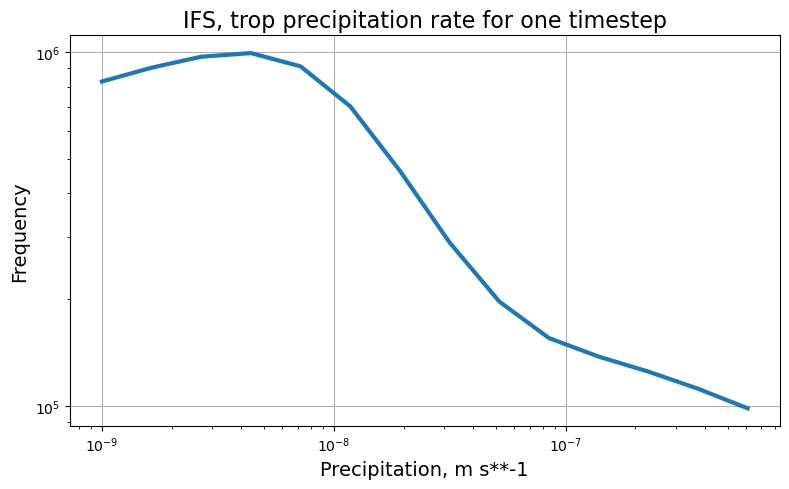

In [28]:
diag.hist_plot(hist_IFS_trop_logspaced, pdf = False, smooth = True, xlogscale=True, label='IFS/IFS_trop_log', plot_title = "IFS, trop precipitation rate for one timestep")

#### Plot of mean and median value of precipitation rate

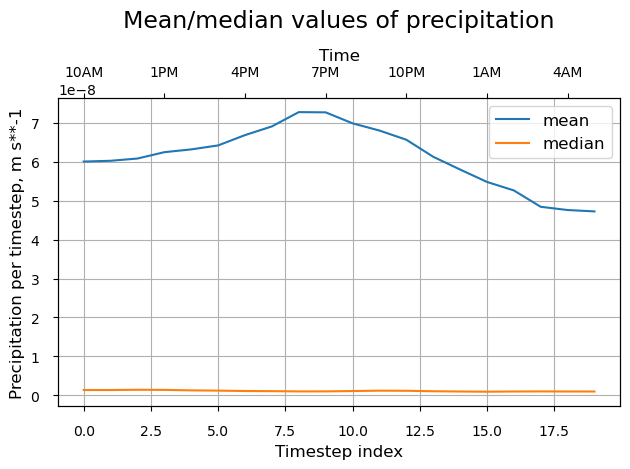

In [29]:
diag.mean_and_median_plot(ifs_chunk, savelabel = 'IFS/IFS')

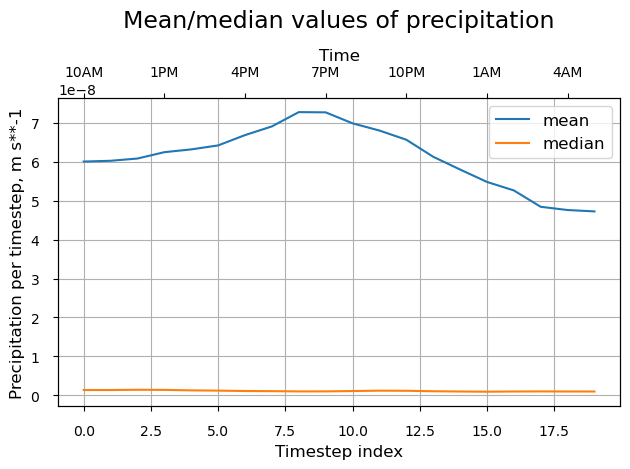

In [30]:
diag.mean_and_median_plot(ifs_chunk_trop, savelabel = 'IFS/IFS_trop')

#### Parameter plots

In [32]:
from aqua.benchmark.graphic_creator import image_creator as image_creator
from aqua.benchmark.graphic_creator import animation_creator as animation_creator

Done!


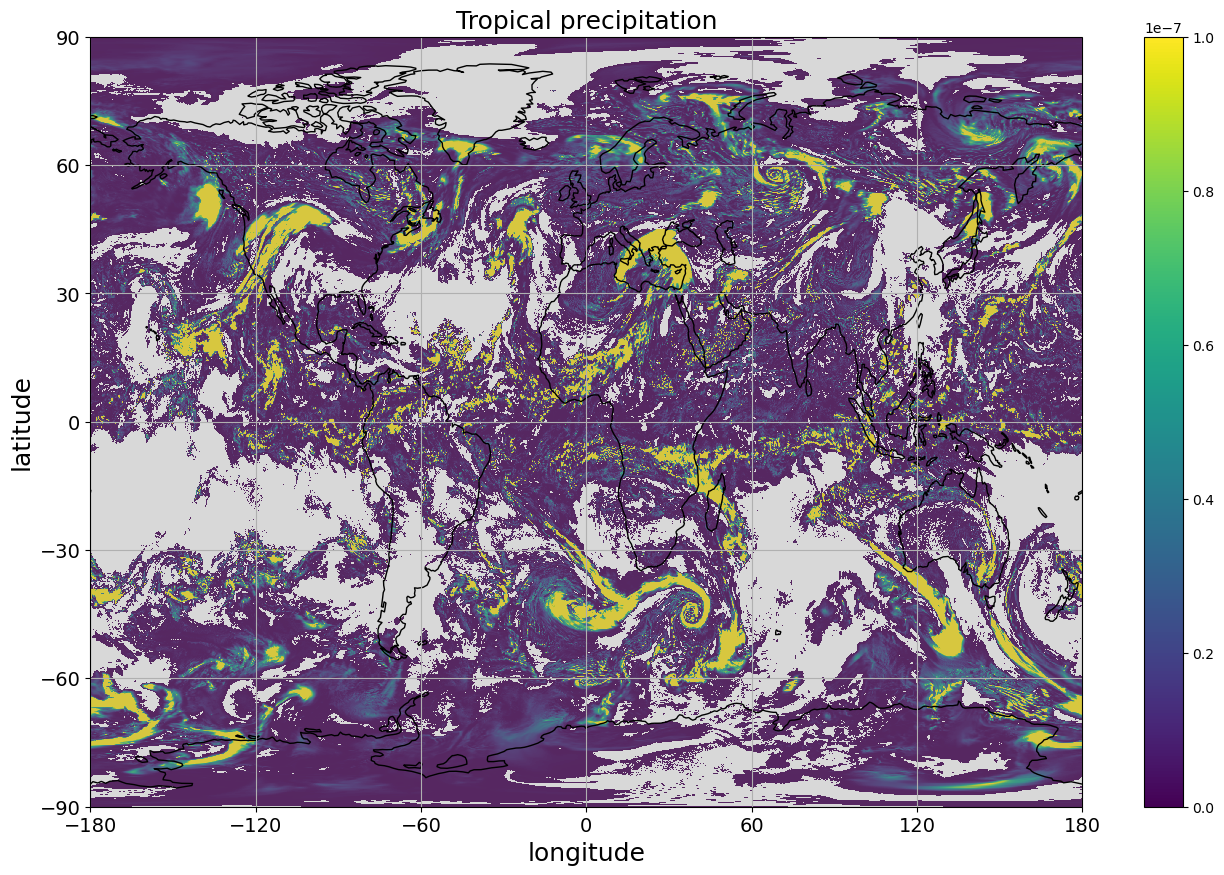

In [37]:
image_creator(ifs_chunk.compute(), vmin =0, vmax = 10**(-7),  figsize =2,  trop_lat = 90,  label='IFS/IFS')

Done!


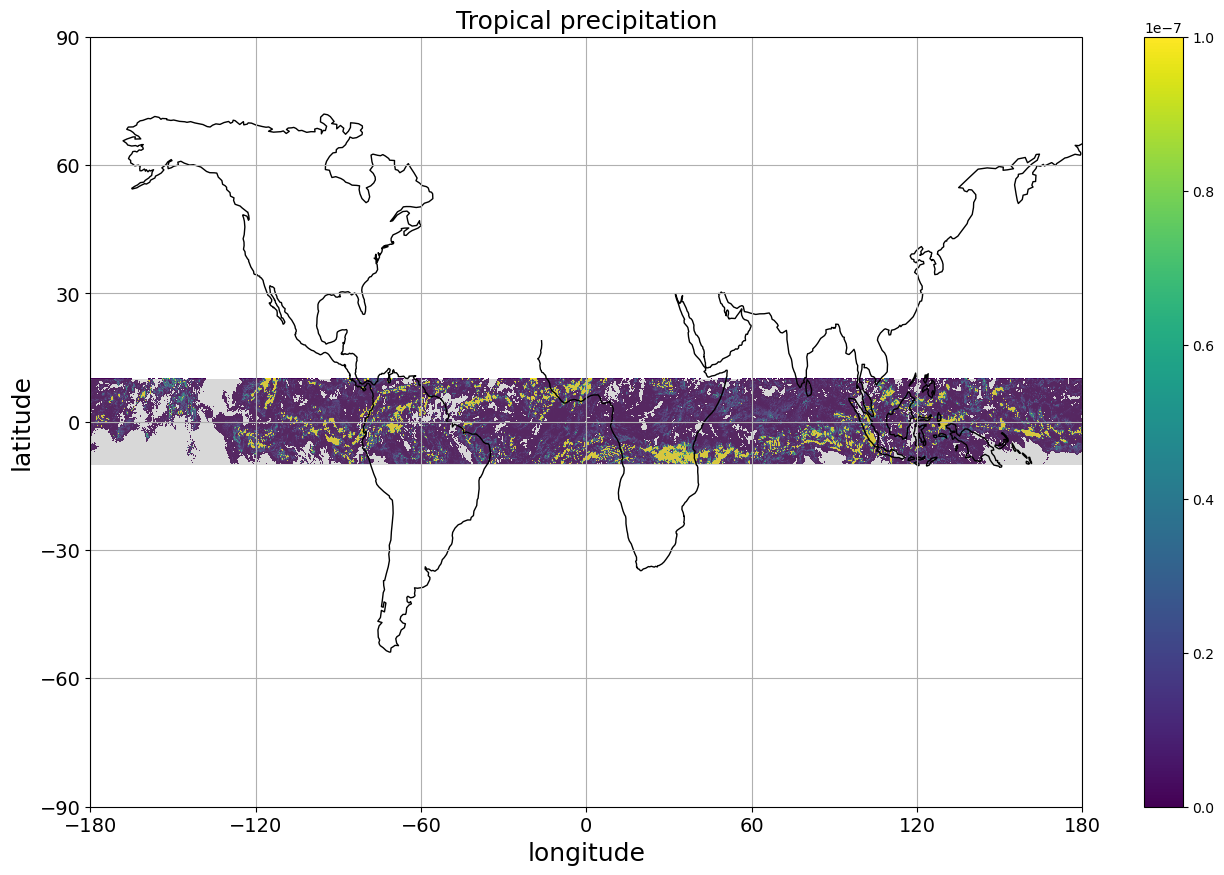

In [36]:
image_creator(ifs_chunk_trop.compute(), vmin =0, vmax = 10**(-7),  figsize =2, label='IFS/IFS_trop')

#

### 6.2. Animation

In [22]:
ifs_chunk = reader.regrid(ifs["tprate"][10:40,:])

.....................Done!


True

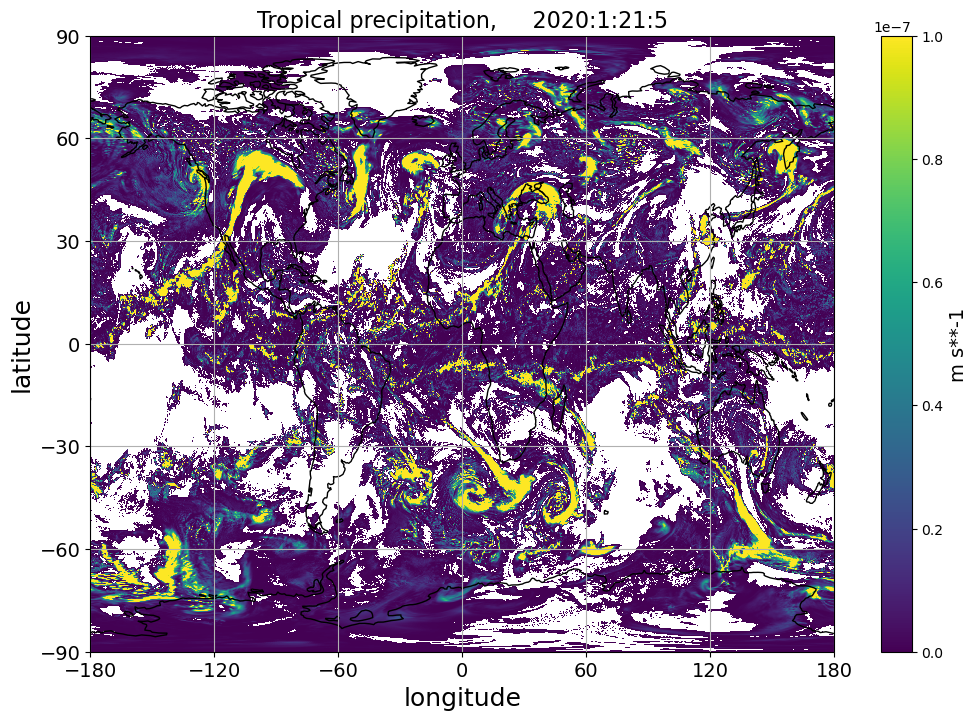

In [38]:
animation_creator(ifs_chunk.compute(), vmin =0, vmax = 10**(-7),   nSeconds = 20,  trop_lat = 90,  label='IFS_tprate')

In [24]:
ifs_chunk_trop = diag.ds_per_lat_range(ifs_chunk)

.....................Done!


True

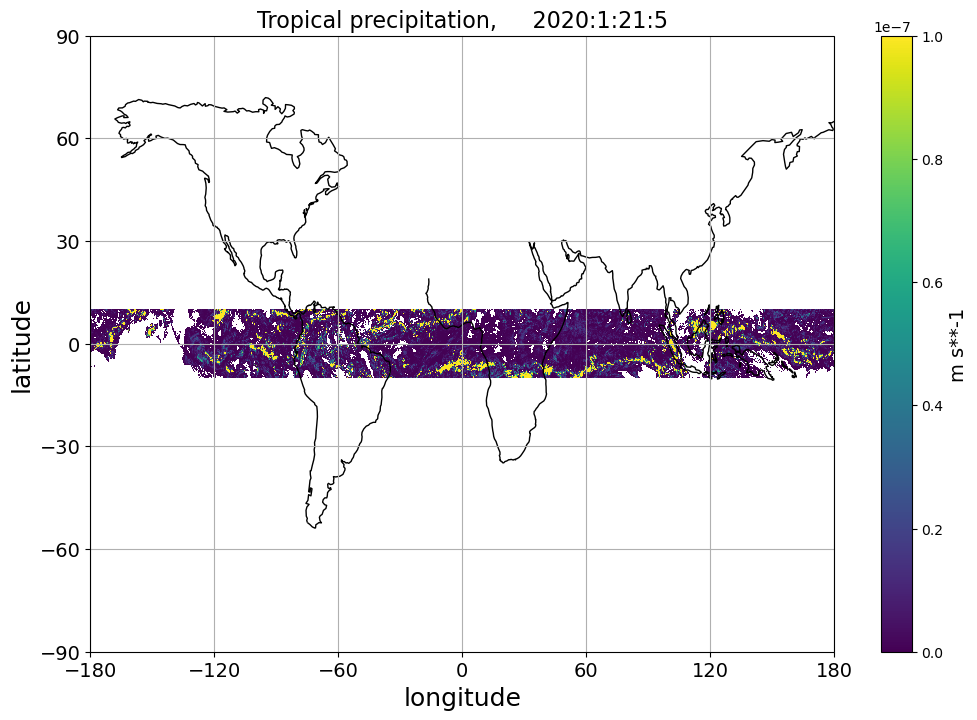

In [40]:
animation_creator(ifs_chunk_trop.compute(), vmin =0, vmax = 10**(-7), nSeconds = 20,  trop_lat = 10,  label='IFS_tprate_trop')

.....................Done!


True

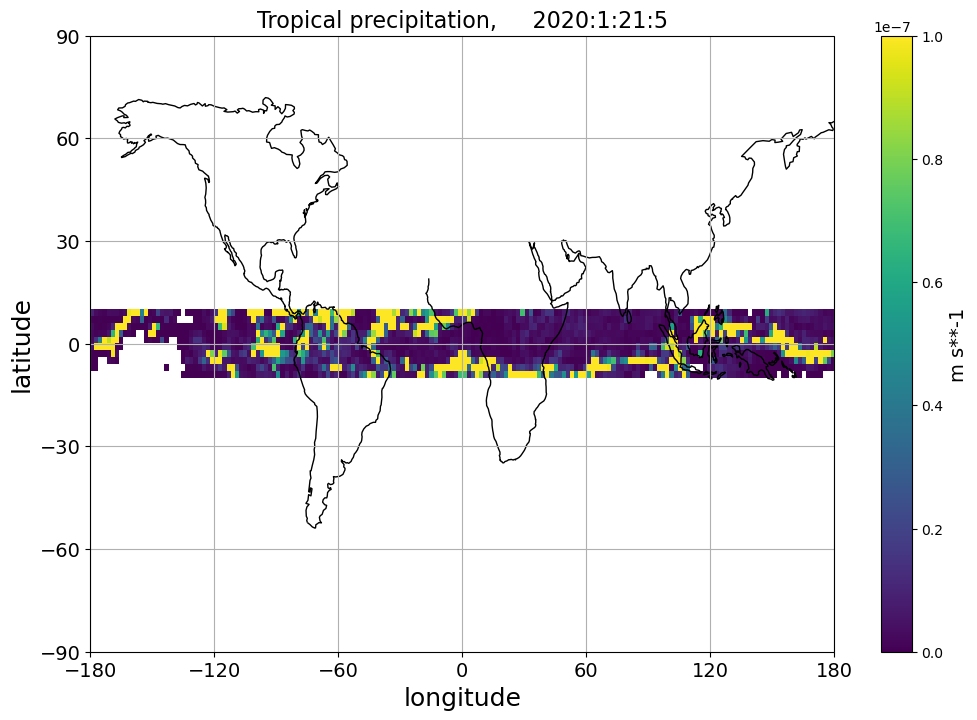

In [25]:
animation_creator(ifs_chunk_trop, vmin =0, vmax = 10**(-7), nSeconds = 20,  trop_lat = 10,  label='IFS_tprate_trop')

[Back to the top of file](#structure)

#

## 6.3 Images with the regrided the coordinates (high and low resolution)

### 6.3.1.Time regriding

In [41]:
from aqua.benchmark.time_functions import time_regrider as time_regrider
from aqua.benchmark.graphic_creator import lon_lat_regrider as lon_lat_regrider

In [ ]:
help(time_regrider)

In [44]:
time_regrider(ifs_chunk_trop, time_grid_factor = -3)

<xarray.DataArray 'tprate' (time: 7, lat: 200, lon: 3600)>
dask.array<setitem, shape=(7, 200, 3600), dtype=float64, chunksize=(1, 200, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T04:00:00
  * lat      (lat) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 9.65 9.75 9.85 9.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [45]:
time_regrider(ifs_chunk_trop, new_time_unit='2H')

<xarray.DataArray 'tprate' (time: 10, lat: 200, lon: 3600)>
dask.array<setitem, shape=(10, 200, 3600), dtype=float64, chunksize=(1, 200, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T10:00:00 ... 2020-01-21T04:00:00
  * lat      (lat) float64 -9.95 -9.85 -9.75 -9.65 -9.55 ... 9.65 9.75 9.85 9.95
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    target_units:               m s**-1
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

### 6.3.2 Space regriding

#### Data regriding into high resolution

In [ ]:
help(lon_lat_regrider)

In [47]:
lat_high_res    = lon_lat_regrider(ifs_chunk, space_grid_factor = 2, coord_name = 'lat')
latlon_high_res  = lon_lat_regrider(lat_high_res, space_grid_factor = 20, coord_name='lon')

/home/b/b382267/mambaforge/envs/tropical-rainfall/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing with an out-of-order index is generating 3600 times more chunks
  return self.array[key]


#### Data regriding into low resolution

In [49]:
lat_low_res    = lon_lat_regrider(ifs_chunk, space_grid_factor = -10, coord_name = 'lat')
latlon_low_res  = lon_lat_regrider(lat_low_res, space_grid_factor = -10, coord_name='lon')

#### Original resolution

Done!


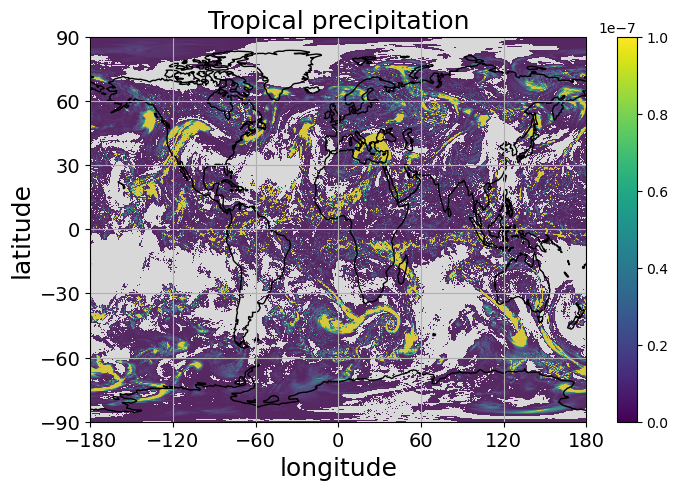

In [50]:
image_creator(ifs_chunk.compute(), vmin = 0, vmax = 10**(-7), figsize=1,  trop_lat = 90,  label='IFS/IFS_original')

#### High resolution

In [ ]:
image_creator(latlon_high_res.compute(), vmin = 0, vmax = 10**(-7), figsize=1, trop_lat = 90,  label='IFS/IFS_regrided_highres') #

#### Low resolution

Done!


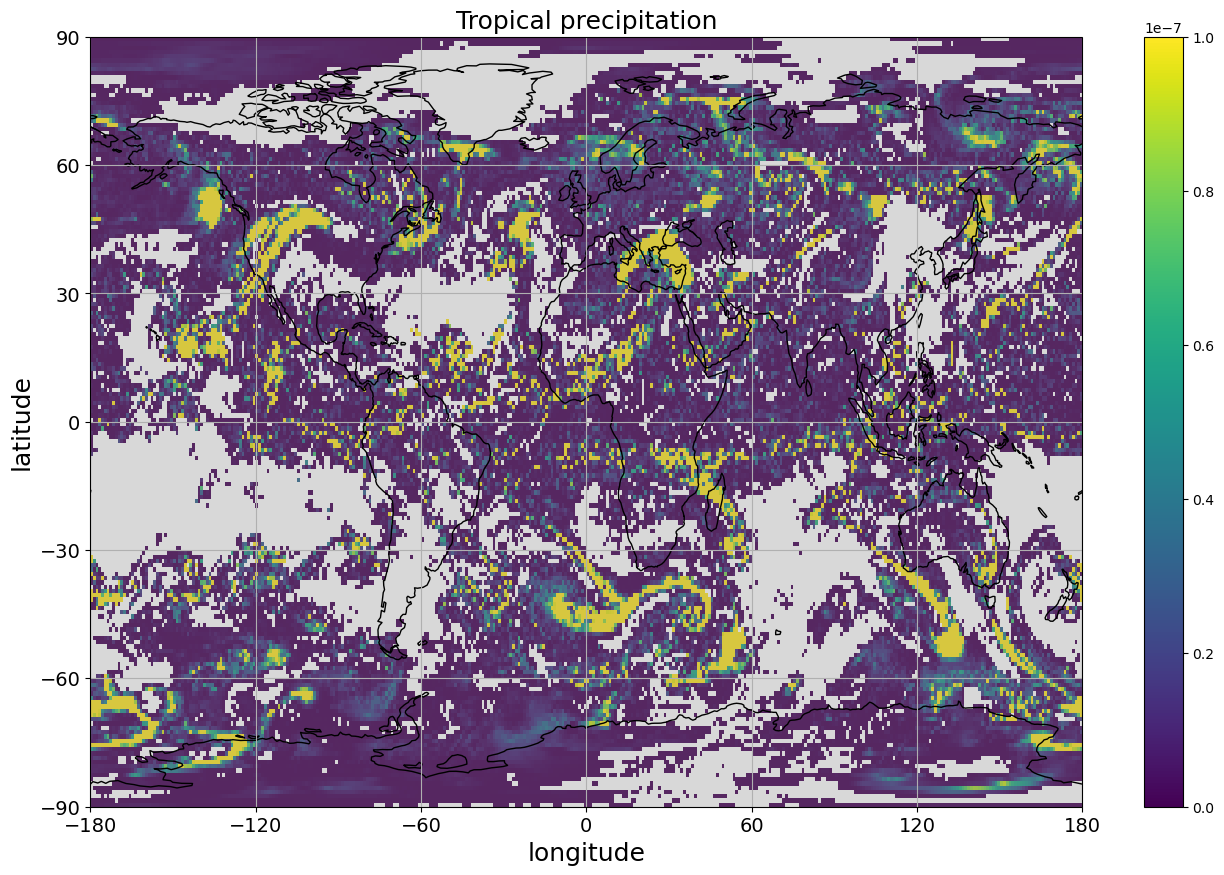

: 

In [53]:
image_creator(latlon_low_res.compute(), vmin = 0, vmax = 10**(-7),  figsize=2, trop_lat = 90,  label='IFS/IFS_regrided_lowres') #

#### The end